# ECS 171 HW 3
## by, Jeffrey Ugochukwu
### 1a
Normalize the numerical variables, encode the categorical variables (you can use label encoding, or one-hot encoding for categorical variables:https://towardsdatascience.com/smarter-ways-to-encode-categorical-data-for-machine-learning-part-1-of-3-6dca2f71b159 (Links to an external site.)) Identify outliers and remove them from the dataset. The training data contains outliers that are defined as samples that are far from the others. With outlier detection, the goal is to fit the regions where the training data is the most concentrated, ignoring the deviant observations. Use any two outlier detection algorithms (e.g. one-class SVM, LOF, Isolation Forest, etc.) and perform at least two of the methods to the churn dataset. (https://scikit-learn.org/stable/modules/svm.html (Links to an external site.))

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import LocalOutlierFactor
from sklearn import preprocessing
from sklearn.covariance import EllipticEnvelope
from sklearn.svm import OneClassSVM
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
sns.set()
df = pd.read_csv("churn.txt")
df.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [2]:
#Info for data types of the columns for the churn dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   State           3333 non-null   object 
 1   Account Length  3333 non-null   int64  
 2   Area Code       3333 non-null   int64  
 3   Phone           3333 non-null   object 
 4   Int'l Plan      3333 non-null   object 
 5   VMail Plan      3333 non-null   object 
 6   VMail Message   3333 non-null   int64  
 7   Day Mins        3333 non-null   float64
 8   Day Calls       3333 non-null   int64  
 9   Day Charge      3333 non-null   float64
 10  Eve Mins        3333 non-null   float64
 11  Eve Calls       3333 non-null   int64  
 12  Eve Charge      3333 non-null   float64
 13  Night Mins      3333 non-null   float64
 14  Night Calls     3333 non-null   int64  
 15  Night Charge    3333 non-null   float64
 16  Intl Mins       3333 non-null   float64
 17  Intl Calls      3333 non-null   i

In [3]:
#Normalize Numerical Columns
#number = np.array(df[["Account Length", "Area Code", "VMail Message", "Day Mins", "Day Calls", "Day Charge", "Eve Mins", "Eve Calls", "Eve Charge", "Night Mins", "Night Calls", "Night Charge", "Intl Mins", "Intl Calls", "Intl Charge", "CustServ Calls"]]).reshape(-1,1)
number = df[["Account Length", "Area Code", "VMail Message", "Day Mins", "Day Calls", "Day Charge", "Eve Mins", "Eve Calls", "Eve Charge", "Night Mins", "Night Calls", "Night Charge", "Intl Mins", "Intl Calls", "Intl Charge", "CustServ Calls"]] /df[["Account Length", "Area Code", "VMail Message", "Day Mins", "Day Calls", "Day Charge", "Eve Mins", "Eve Calls", "Eve Charge", "Night Mins", "Night Calls", "Night Charge", "Intl Mins", "Intl Calls", "Intl Charge", "CustServ Calls"]].abs().max()
number
#norm = preprocessing.normalize([number])
#norm

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,0.526749,0.813725,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.440329,0.813725,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.563786,0.813725,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
3,0.345679,0.800000,0.000000,0.853478,0.430303,0.853454,0.170195,0.517647,0.170171,0.498481,0.508571,0.498593,0.330,0.35,0.329630,0.222222
4,0.308642,0.813725,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.790123,0.813725,0.705882,0.445268,0.466667,0.445171,0.592521,0.741176,0.592688,0.706582,0.474286,0.706809,0.495,0.30,0.494444,0.222222
3329,0.279835,0.813725,0.000000,0.658780,0.345455,0.658786,0.421776,0.323529,0.421870,0.484304,0.702857,0.484524,0.480,0.20,0.479630,0.333333
3330,0.115226,1.000000,0.000000,0.515393,0.660606,0.515426,0.794061,0.341176,0.794241,0.485823,0.520000,0.486213,0.705,0.30,0.705556,0.222222
3331,0.757202,1.000000,0.000000,0.609464,0.636364,0.609490,0.438823,0.494118,0.439016,0.352405,0.782857,0.352279,0.250,0.50,0.250000,0.222222


In [4]:
#Actual encoding of categorical variables by selecting the object datatypes
object_col = df.select_dtypes(["object"]).columns.values
object_col

array(['State', 'Phone', "Int'l Plan", 'VMail Plan', 'Churn?'],
      dtype=object)

In [5]:
df[object_col]

,State,Phone,Int'l Plan,VMail Plan,Churn?
0,KS,382-4657,no,yes,False.
1,OH,371-7191,no,yes,False.
2,NJ,358-1921,no,no,False.
3,OH,375-9999,yes,no,False.
4,OK,330-6626,yes,no,False.
...,...,...,...,...,...
3328,AZ,414-4276,no,yes,False.
3329,WV,370-3271,no,no,False.
3330,RI,328-8230,no,no,False.
3331,CT,364-6381,yes,no,False.


In [6]:
pd.get_dummies(df, columns = ["State"]).head()

,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,...,State_SD,State_TN,State_TX,State_UT,State_VA,State_VT,State_WA,State_WI,State_WV,State_WY
0,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,...,0,0,0,0,0,0,0,0,0,0
1,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,...,0,0,0,0,0,0,0,0,0,0
2,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,...,0,0,0,0,0,0,0,0,0,0
3,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,...,0,0,0,0,0,0,0,0,0,0
4,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,...,0,0,0,0,0,0,0,0,0,0


In [8]:
#Used MinMaxScaler to transform two placeholder categorical columns
minmax = MinMaxScaler()
df_t = minmax.fit_transform(df[["Account Length", "Area Code"]])
df_t

array([[0.52479339, 0.06862745],
       [0.43801653, 0.06862745],
       [0.56198347, 0.06862745],
       ...,
       [0.11157025, 1.        ],
       [0.75619835, 1.        ],
       [0.30165289, 0.06862745]])

In [9]:
#Detecting outliers for numerical columns using LocalOutlierFactor
d = LocalOutlierFactor(n_jobs = -1)
pred_d = d.fit_predict(number)
pd.crosstab(pred_d, columns = ["count"])

col_0,count
row_0,
-1,17
1,3316


In [10]:
#Finding indicies of outliers
np.where(pred_d == -1)

(array([  15,   22,   32,  115,  535,  542,  878,  911,  960, 1345, 1397,
        1567, 2321, 2380, 2663, 2732, 2932], dtype=int64),)

In [11]:
#Detecting outliers for numerical columns with the EllipticEnvelope() class
elip = EllipticEnvelope()
pred_elip = elip.fit_predict(number)
pd.crosstab(pred_elip, columns = ["count"])

col_0,count
row_0,
-1,334
1,2999


In [13]:
#Locating the outliers
np.where(pred_elip == -1)

(array([   6,   15,   21,   22,   30,   32,   41,   58,   77,  115,  116,
         153,  154,  156,  166,  179,  181,  182,  185,  197,  198,  211,
         238,  244,  247,  250,  260,  288,  289,  301,  302,  315,  329,
         332,  341,  343,  345,  349,  360,  365,  367,  377,  380,  395,
         407,  421,  469,  473,  474,  475,  483,  488,  493,  504,  514,
         515,  522,  529,  534,  535,  541,  542,  544,  547,  548,  579,
         588,  595,  605,  616,  617,  636,  646,  652,  674,  688,  692,
         694,  712,  721,  723,  740,  741,  756,  762,  763,  767,  778,
         817,  835,  837,  842,  850,  863,  878,  883,  901,  902,  908,
         911,  913,  918,  921,  922,  925,  928,  957,  960,  961,  974,
         982,  985,  986,  989,  990, 1010, 1020, 1021, 1028, 1038, 1044,
        1050, 1052, 1072, 1076, 1080, 1092, 1093, 1099, 1102, 1109, 1121,
        1142, 1144, 1161, 1162, 1179, 1190, 1202, 1233, 1241, 1260, 1273,
        1317, 1322, 1325, 1333, 1343, 

In [15]:
#Intersection of indicies with outliers using the 2 different classes
np.intersect1d(np.where(pred_d == -1), np.where(pred_elip == -1))

array([  15,   22,   32,  115,  535,  542,  878,  911,  960, 1345, 1397,
       1567, 2321, 2380, 2663, 2732, 2932], dtype=int64)

In [16]:
#df.drop(df.index[15], df.index[22], df.index[32], df.index[115], df.index[535], df.index[542], df.index[878])
q = df.quantile(0.99)
df[df < q]

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,NaN,128.0,415.0,NaN,NaN,NaN,25.0,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,NaN
1,NaN,107.0,415.0,NaN,NaN,NaN,26.0,161.6,123.0,27.47,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,NaN
2,NaN,137.0,415.0,NaN,NaN,NaN,0.0,243.4,114.0,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,0.0,NaN
3,NaN,84.0,408.0,NaN,NaN,NaN,0.0,299.4,71.0,50.90,...,88.0,5.26,196.9,89.0,8.86,6.6,7.0,1.78,2.0,NaN
4,NaN,75.0,415.0,NaN,NaN,NaN,0.0,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,NaN,192.0,415.0,NaN,NaN,NaN,36.0,156.2,77.0,26.55,...,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,NaN
3329,NaN,68.0,415.0,NaN,NaN,NaN,0.0,231.1,57.0,39.29,...,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,NaN
3330,NaN,28.0,NaN,NaN,NaN,NaN,0.0,180.8,109.0,30.74,...,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,NaN
3331,NaN,184.0,NaN,NaN,NaN,NaN,0.0,213.8,105.0,36.35,...,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,NaN


In [17]:
q_low = df.quantile(0.01)
q_hi  = df.quantile(0.99)

df_filtered = df[(df < q_hi) & (df > q_low)]
df_filtered

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,NaN,128.0,415.0,NaN,NaN,NaN,25.0,265.1,110.0,45.07,...,99.0,16.78,244.7,91.0,11.01,10.0,3.0,2.70,1.0,NaN
1,NaN,107.0,415.0,NaN,NaN,NaN,26.0,161.6,123.0,27.47,...,103.0,16.62,254.4,103.0,11.45,13.7,3.0,3.70,1.0,NaN
2,NaN,137.0,415.0,NaN,NaN,NaN,NaN,243.4,114.0,41.38,...,110.0,10.30,162.6,104.0,7.32,12.2,5.0,3.29,NaN,NaN
3,NaN,84.0,NaN,NaN,NaN,NaN,NaN,299.4,71.0,50.90,...,88.0,NaN,196.9,89.0,8.86,6.6,7.0,1.78,2.0,NaN
4,NaN,75.0,415.0,NaN,NaN,NaN,NaN,166.7,113.0,28.34,...,122.0,12.61,186.9,121.0,8.41,10.1,3.0,2.73,3.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,NaN,192.0,415.0,NaN,NaN,NaN,36.0,156.2,77.0,26.55,...,126.0,18.32,279.1,83.0,12.56,9.9,6.0,2.67,2.0,NaN
3329,NaN,68.0,415.0,NaN,NaN,NaN,NaN,231.1,57.0,39.29,...,55.0,13.04,191.3,123.0,8.61,9.6,4.0,2.59,3.0,NaN
3330,NaN,28.0,NaN,NaN,NaN,NaN,NaN,180.8,109.0,30.74,...,58.0,24.55,191.9,91.0,8.64,14.1,6.0,3.81,2.0,NaN
3331,NaN,184.0,NaN,NaN,NaN,NaN,NaN,213.8,105.0,36.35,...,84.0,13.57,139.2,137.0,6.26,5.0,10.0,1.35,2.0,NaN


In [18]:
#Outlier detection using the one-class Support Vector Machine
detector = OneClassSVM(nu=0.05)
predicted = detector.fit_predict(number)
print("Support Vector Machine:")
print(pd.crosstab(predicted, columns=['count']))

Support Vector Machine:
col_0  count
row_0       
-1       165
 1      3168


In [19]:
#Dropping Outliers from the Support Vector Machine
svm_outcome = np.where(predicted == -1)
print(f"Size before dropping outlier(s): {len(number)}")
number_clean = number.drop(svm_outcome[0])
print(f"Size after dropping outlier(s): {len(number_clean)}")

Size before dropping outlier(s): 3333
Size after dropping outlier(s): 3168


### 1b
Are there any outliers on the dataset? Do the methods agree on the detected outliers and why? What are the assumptions behind each method? Remove any outliers (using a single method) and then continue with this new, revised dataset.

### Answer:
Based on the two methods (Local Outlier Factor and One-Class Support Vector Machine), there are outliers in the dataset. The methods don't exactly agree upon how many outliers exist since the Local Outlier Factor medthod detected 17 outliers whereas the Support Vector Machine detected 165 outliers. The assumption of the Local Outlier Factor Method is that it's a ratio of the Local Reachability Detetction method over it's K-Nearest Neighbors and if the ratio is greater than one, it's an outlier; otherwise, it's not. The assumption behind the One-Class Support Vector Machine is that it's an unsupervised algorithm that learns a decision function for novelty detection: classifying new data as similar or different to the training set.

In [20]:
#Using cleaned variable from part A post outlier dtection to remove outliers
number_clean

,Account Length,Area Code,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls
0,0.526749,0.813725,0.490196,0.755701,0.666667,0.755701,0.542755,0.582353,0.542866,0.619494,0.520000,0.619584,0.500,0.15,0.500000,0.111111
1,0.440329,0.813725,0.509804,0.460661,0.745455,0.460597,0.537531,0.605882,0.537690,0.644051,0.588571,0.644344,0.685,0.15,0.685185,0.111111
2,0.563786,0.813725,0.000000,0.693843,0.690909,0.693830,0.333242,0.647059,0.333225,0.411646,0.594286,0.411930,0.610,0.25,0.609259,0.000000
4,0.308642,0.813725,0.000000,0.475200,0.684848,0.475184,0.407754,0.717647,0.407959,0.473165,0.691429,0.473270,0.505,0.15,0.505556,0.333333
5,0.485597,1.000000,0.000000,0.636830,0.593939,0.636821,0.606544,0.594118,0.606600,0.516203,0.674286,0.516601,0.315,0.30,0.314815,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3328,0.790123,0.813725,0.705882,0.445268,0.466667,0.445171,0.592521,0.741176,0.592688,0.706582,0.474286,0.706809,0.495,0.30,0.494444,0.222222
3329,0.279835,0.813725,0.000000,0.658780,0.345455,0.658786,0.421776,0.323529,0.421870,0.484304,0.702857,0.484524,0.480,0.20,0.479630,0.333333
3330,0.115226,1.000000,0.000000,0.515393,0.660606,0.515426,0.794061,0.341176,0.794241,0.485823,0.520000,0.486213,0.705,0.30,0.705556,0.222222
3331,0.757202,1.000000,0.000000,0.609464,0.636364,0.609490,0.438823,0.494118,0.439016,0.352405,0.782857,0.352279,0.250,0.50,0.250000,0.222222


### 1c
Plot a correlation matrix to identify the correlated variables in the revised churn dataset obtained from part b) (https://heartbeat.fritz.ai/seaborn-heatmaps-13-ways-to-customize-correlation-matrix-visualizations-f1c49c816f07 (Links to an external site.)) and use seaborn library. Given that correlated features don't improve models, deal with the highly correlated variables by removing correlated features i.e., if you have two features that are highly correlated, you need to remove one. The reason for removing correlated features is to make the algorithm faster because less features means higher speed. Furthermore, removing highly correlated features decreases harmful bias in the final model.

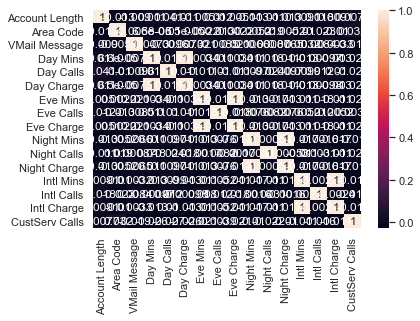

In [21]:
#Heatmap with revised dataset
g = sns.heatmap(number_clean.corr(),annot=True)

### 2a
Use the preprocessed churn dataset from Q1 to create a 4-layer artificial neural network (ANN) and specifically a feed-forwardmultilayer perceptron (with sigmoid activations and MSE loss function) to perform multi-class classification to classify 'Churn' based on other variables and describe the topology of the model (how many layers, how many neurons at each layer).
The variables of the datset are explained in the link provided above. Use the 70:30 data split and use the training set for training the model and the test set to evaluate the model performance. Please note that this is a binary classification problem so select the right number of nodes accordingly for the output layer. Also report precision and recall for the test set. 

In [22]:
#Dropping State and Phone Columns
df = df.drop(columns=['State', 'Phone'])
df.head()

,Account Length,Area Code,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,Eve Mins,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,128,415,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,107,415,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,137,415,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,84,408,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,75,415,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   int64  
 1   Area Code       3333 non-null   int64  
 2   Int'l Plan      3333 non-null   object 
 3   VMail Plan      3333 non-null   object 
 4   VMail Message   3333 non-null   int64  
 5   Day Mins        3333 non-null   float64
 6   Day Calls       3333 non-null   int64  
 7   Day Charge      3333 non-null   float64
 8   Eve Mins        3333 non-null   float64
 9   Eve Calls       3333 non-null   int64  
 10  Eve Charge      3333 non-null   float64
 11  Night Mins      3333 non-null   float64
 12  Night Calls     3333 non-null   int64  
 13  Night Charge    3333 non-null   float64
 14  Intl Mins       3333 non-null   float64
 15  Intl Calls      3333 non-null   int64  
 16  Intl Charge     3333 non-null   float64
 17  CustServ Calls  3333 non-null   i

In [24]:
object2 = df.select_dtypes(["object"]).columns.values
object2

array(["Int'l Plan", 'VMail Plan', 'Churn?'], dtype=object)

In [25]:
df[object2]

,Int'l Plan,VMail Plan,Churn?
0,no,yes,False.
1,no,yes,False.
2,no,no,False.
3,yes,no,False.
4,yes,no,False.
...,...,...,...
3328,no,yes,False.
3329,no,no,False.
3330,no,no,False.
3331,yes,no,False.


In [26]:
number.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Account Length  3333 non-null   float64
 1   Area Code       3333 non-null   float64
 2   VMail Message   3333 non-null   float64
 3   Day Mins        3333 non-null   float64
 4   Day Calls       3333 non-null   float64
 5   Day Charge      3333 non-null   float64
 6   Eve Mins        3333 non-null   float64
 7   Eve Calls       3333 non-null   float64
 8   Eve Charge      3333 non-null   float64
 9   Night Mins      3333 non-null   float64
 10  Night Calls     3333 non-null   float64
 11  Night Charge    3333 non-null   float64
 12  Intl Mins       3333 non-null   float64
 13  Intl Calls      3333 non-null   float64
 14  Intl Charge     3333 non-null   float64
 15  CustServ Calls  3333 non-null   float64
dtypes: float64(16)
memory usage: 416.8 KB


In [27]:
#Doing Train-Test-Split
train, test = train_test_split(number, train_size = 0.7)
model = keras.Sequential()
model.add(layers.Dense(4, input_dim = train.drop("Area Code", axis = 1).shape[1], activation = "sigmoid"))
model.add(layers.Dense(4, activation = "sigmoid"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [28]:
#Calculating MSE
model.compile(loss = "mse", optimizer = "sgd", metrics = ["accuracy"])

In [32]:
#Made callback class for weights
class FitCallBack(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs = None):
        weights.append(self.model.layers[1].get_weights())

In [34]:
#Calculating the Epochs
weights = []
result = model.fit(train.drop("Area Code", axis = 1), train["Area Code"], epochs = 100, batch_size = 32, verbose = 1, callbacks = [FitCallBack()])

Epoch 1/100
73/73 [==============================] - 1s 2ms/step - loss: 0.2416 - accuracy: 0.0000e+00
Epoch 2/100
73/73 [==============================] - 0s 3ms/step - loss: 0.1588 - accuracy: 0.0263
Epoch 3/100
73/73 [==============================] - 0s 3ms/step - loss: 0.1019 - accuracy: 0.2632
Epoch 4/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0676 - accuracy: 0.2606
Epoch 5/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0472 - accuracy: 0.2564
Epoch 6/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0333 - accuracy: 0.2365
Epoch 7/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0267 - accuracy: 0.2513
Epoch 8/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0218 - accuracy: 0.2561
Epoch 9/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0182 - accuracy: 0.2554
Epoch 10/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0163 - accuracy: 0.2671
Epoch

In [35]:
#Finding weights
weights

[[array([[ 0.76715446,  0.15339695,  0.6739139 ,  0.1685808 ],
         [ 0.7001153 ,  0.20220755, -0.29473075, -0.20072657],
         [-0.7554765 ,  0.04911952, -0.14080645,  0.69172734],
         [ 0.80080354,  0.7752143 ,  0.7581805 ,  0.52540225]],
        dtype=float32),
  array([-1.2261000e-04, -5.3841580e-04,  3.3954919e-05,  9.5852854e-05],
        dtype=float32)],
 [array([[ 0.7671004 ,  0.15315793,  0.67392933,  0.16862373],
         [ 0.70004845,  0.20191172, -0.29471165, -0.20067342],
         [-0.7555023 ,  0.04900579, -0.14079912,  0.6917477 ],
         [ 0.8007629 ,  0.7750347 ,  0.75819206,  0.5254345 ]],
        dtype=float32),
  array([-2.4445009e-04, -1.0769169e-03,  6.8697853e-05,  1.9258016e-04],
        dtype=float32)],
 [array([[ 0.76704776,  0.15292549,  0.6739447 ,  0.16866581],
         [ 0.69998294,  0.20162234, -0.29469252, -0.20062101],
         [-0.7555295 ,  0.04888576, -0.14079118,  0.6917694 ],
         [ 0.80072236,  0.7748558 ,  0.7582039 ,  0.5254669

### 2b
Provide two plots: 1)the weight values (only bias) per iteration for the last layer, 2) training and test error per iteration. Use stochastic gradient descent with back-propagation. When reporting error, use the ratio of misclassified samples.

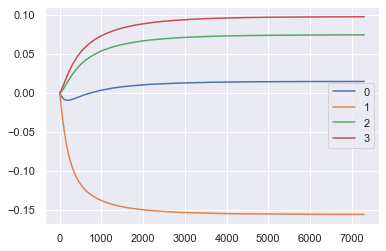

In [36]:
#Plot for weights
pd.DataFrame([x[-1] for x in weights]).plot()

In [41]:
#Callback class for training data 
class HaltCallBack(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs = None):
        training.append(self.model.layers[1].get_weights())

In [42]:
#Epochs
training = []
result = model.fit(train.drop("Area Code", axis = 1), train["Area Code"], epochs = 100, batch_size = 32, verbose = 1, callbacks = [HaltCallBack()])

Epoch 1/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.2563
Epoch 2/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.2563
Epoch 3/100
73/73 [==============================] - ETA: 0s - loss: 0.0070 - accuracy: 0.25 - 0s 4ms/step - loss: 0.0070 - accuracy: 0.2563
Epoch 4/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.2563
Epoch 5/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.2563
Epoch 6/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0070 - accuracy: 0.2563
Epoch 7/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.2563
Epoch 8/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.2563
Epoch 9/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0070 - accuracy: 0.2563
Epoch 10/100
73/73 [==============================] - 0s 4ms/step -

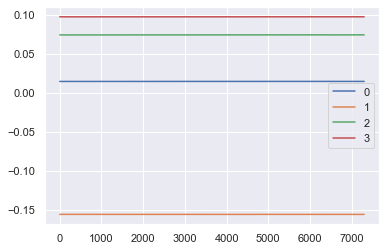

In [43]:
#Plot for Training Data
pd.DataFrame([x[-1] for x in training]).plot()

### 3
Now re-train the ANN with all your data (all samples). What is your training error? 

In [44]:
#Building ANN
train, test = train_test_split(number, train_size = 0.7)
model = keras.Sequential()
model.add(layers.Dense(4, input_dim = train.drop("VMail Message", axis = 1).shape[1], activation = "sigmoid"))
model.add(layers.Dense(4, activation = "sigmoid"))
model.add(layers.Dense(1, activation = "sigmoid"))

In [45]:
#Compiling model
model.compile(loss = "mse", optimizer = "sgd", metrics = ["accuracy"])

In [47]:
#Callback class for weights
class CuomoCallBack(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs = None):
        weights.append(self.model.layers[1].get_weights())

In [48]:
#Calculating the Epochs
weights = []
result = model.fit(train.drop("VMail Message", axis = 1), train["VMail Message"], epochs = 100, batch_size = 32, verbose = 1, callbacks = [CuomoCallBack()])

Epoch 1/100
73/73 [==============================] - 1s 3ms/step - loss: 0.0984 - accuracy: 0.7421
Epoch 2/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0904 - accuracy: 0.7219
Epoch 3/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0889 - accuracy: 0.7197
Epoch 4/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0848 - accuracy: 0.7171
Epoch 5/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0818 - accuracy: 0.7159
Epoch 6/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0793 - accuracy: 0.7232
Epoch 7/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0787 - accuracy: 0.7194
Epoch 8/100
73/73 [==============================] - 0s 2ms/step - loss: 0.0771 - accuracy: 0.7146
Epoch 9/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0770 - accuracy: 0.7205
Epoch 10/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0730 - accuracy: 0.7120
Epoch 11/

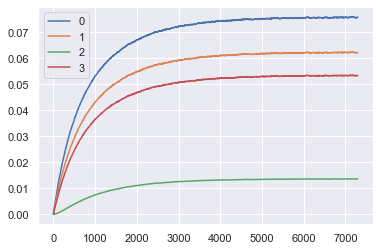

In [49]:
#Plot for weights
pd.DataFrame([x[-1] for x in weights]).plot()

In [ ]:
#Callback class for training data
class ReCallBack(keras.callbacks.Callback):
    def on_train_batch_end(self, batch, logs = None):
        training.append(self.model.layers[1].get_weights())

In [51]:
#Epochs
training = []
result = model.fit(train.drop("Area Code", axis = 1), train["CustServ Calls"], epochs = 100, batch_size = 32, verbose = 1, callbacks = [HaltCallBack()])

Epoch 1/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4651 - accuracy: 4.2863e-04
Epoch 2/100
73/73 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 4.2863e-04
Epoch 3/100
73/73 [==============================] - 0s 2ms/step - loss: 0.3454 - accuracy: 4.2863e-04
Epoch 4/100
73/73 [==============================] - 0s 3ms/step - loss: 0.2747 - accuracy: 4.2863e-04
Epoch 5/100
73/73 [==============================] - 0s 3ms/step - loss: 0.2077 - accuracy: 4.2863e-04
Epoch 6/100
73/73 [==============================] - 0s 3ms/step - loss: 0.1527 - accuracy: 4.2863e-04
Epoch 7/100
73/73 [==============================] - 0s 3ms/step - loss: 0.1123 - accuracy: 0.1997
Epoch 8/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0846 - accuracy: 0.2105
Epoch 9/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0660 - accuracy: 0.2105
Epoch 10/100
73/73 [==============================] - 0s 3ms/step - loss: 0.0535 - ac

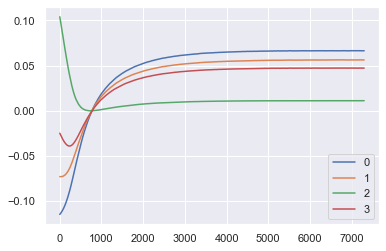

In [52]:
#Plot for Training Data
pd.DataFrame([x[-1] for x in training]).plot()